In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers

Preparing Dataset for Testing and Training.

In [2]:
with open("data.json","r") as fp:
    data=json.load(fp)
inputs=np.array(data["mfcc"])
targets=np.array(data["labels"])
genres=np.array(data["mapping"])

In [3]:
X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.3)

Creation of RNN Model by adding LSTM (Long Short-Term Memory) layer as input of existing CNN Model.

In [4]:
model=models.Sequential()
model.add(layers.LSTM(259,input_shape=(259,13)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 259)               282828    
_________________________________________________________________
dropout (Dropout)            (None, 259)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               133120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training of Model.

In [7]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
110/110 [==============================] - 6s 35ms/step - loss: 2.1378 - accuracy: 0.2389 - val_loss: 1.6209 - val_accuracy: 0.4179
Epoch 2/100
110/110 [==============================] - 3s 25ms/step - loss: 1.7215 - accuracy: 0.3796 - val_loss: 1.4661 - val_accuracy: 0.4539
Epoch 3/100
110/110 [==============================] - 3s 25ms/step - loss: 1.6127 - accuracy: 0.4060 - val_loss: 1.4057 - val_accuracy: 0.4846
Epoch 4/100
110/110 [==============================] - 3s 25ms/step - loss: 1.4994 - accuracy: 0.4609 - val_loss: 1.2876 - val_accuracy: 0.5581
Epoch 5/100
110/110 [==============================] - 3s 25ms/step - loss: 1.3910 - accuracy: 0.4868 - val_loss: 1.2792 - val_accuracy: 0.5234
Epoch 6/100
110/110 [==============================] - 3s 25ms/step - loss: 1.3346 - accuracy: 0.5158 - val_loss: 1.2589 - val_accuracy: 0.5334
Epoch 7/100
110/110 [==============================] - 3s 25ms/step - loss: 1.3288 - accuracy: 0.5119 - val_loss: 1.1670 - val_accuracy:

Plotting values of Accuracy and Error during both Training and Testing phases.

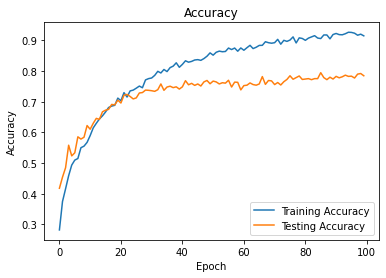

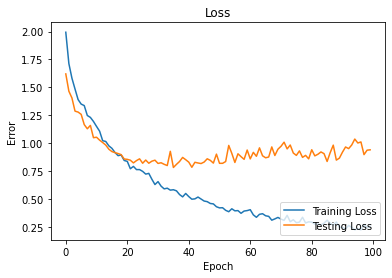

In [8]:
plt.plot(model.history.history['accuracy'],label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Testing Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.plot(model.history.history['loss'],label='Training Loss')
plt.plot(model.history.history['val_loss'],label='Testing Loss')
plt.title('Loss')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Calculating Testing Accuracy and Loss.

In [9]:
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print("Accuracy is {}".format(test_accuracy))
print("Error is {}".format(test_error))

Accuracy is 0.7843791842460632
Error is 0.9411900043487549


Prediction using Model.

In [10]:
def predict(model,X,y):
    X=X[np.newaxis,...]
    prediction=model.predict(X)
    predicted_index=np.argmax(prediction,axis=1)
    print("Expected index: {}, Outcome Index: {}".format(y,predicted_index))
    print("Expected genre: {}, Outcome genre: {}".format(genres[y],genres[predicted_index]))

In [11]:
X=X_test[100]
y=y_test[100]

In [12]:
predict(model,X,y)

Expected index: 6, Outcome Index: [6]
Expected genre: metal, Outcome genre: ['metal']


Saving Model for future use.

In [13]:
model_json = model.to_json()
with open("RNN_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("RNN_model.h5")